In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
import argparse
import math

In [2]:
tf.enable_eager_execution()

# Show example of images

In [3]:
dirlist = lambda di: [os.path.join(di, file) for file in os.listdir(di) if 'part-' in file]
training_files = dirlist('../droughtwatch/data/val/')

def parse_visual(data):
    dataset = tf.data.TFRecordDataset(data)
    # pattern for one part file
    # dataset = tf.data.TFRecordDataset('part-r-00099')
    iterator = dataset.make_one_shot_iterator()

    features = {
        'B2': tf.FixedLenFeature([], tf.string),
        'B3': tf.FixedLenFeature([], tf.string),
        'B4': tf.FixedLenFeature([], tf.string),
        'label': tf.FixedLenFeature([], tf.int64),
    }

    parsed_examples = [tf.parse_single_example(data, features) for data in iterator]
    return parsed_examples

parsed_examples = parse_visual(training_files[0])

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.


In [4]:
def get_img_from_example(parsed_example, intensify=True):
    rgbArray = np.zeros((65,65,3), 'uint8')
    for i, band in enumerate(['B4', 'B3', 'B2']):
        band_data = np.frombuffer(parsed_example[band].numpy(), dtype=np.uint8)
        band_data = band_data.reshape(65, 65)
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        rgbArray[..., i] = band_data
        
    label = tf.cast(parsed_example['label'], tf.int32).numpy()
        
    return rgbArray, label

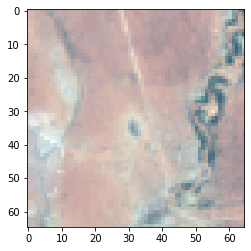

In [5]:
img, label = get_img_from_example(parsed_examples[13])
plt.imshow(img)

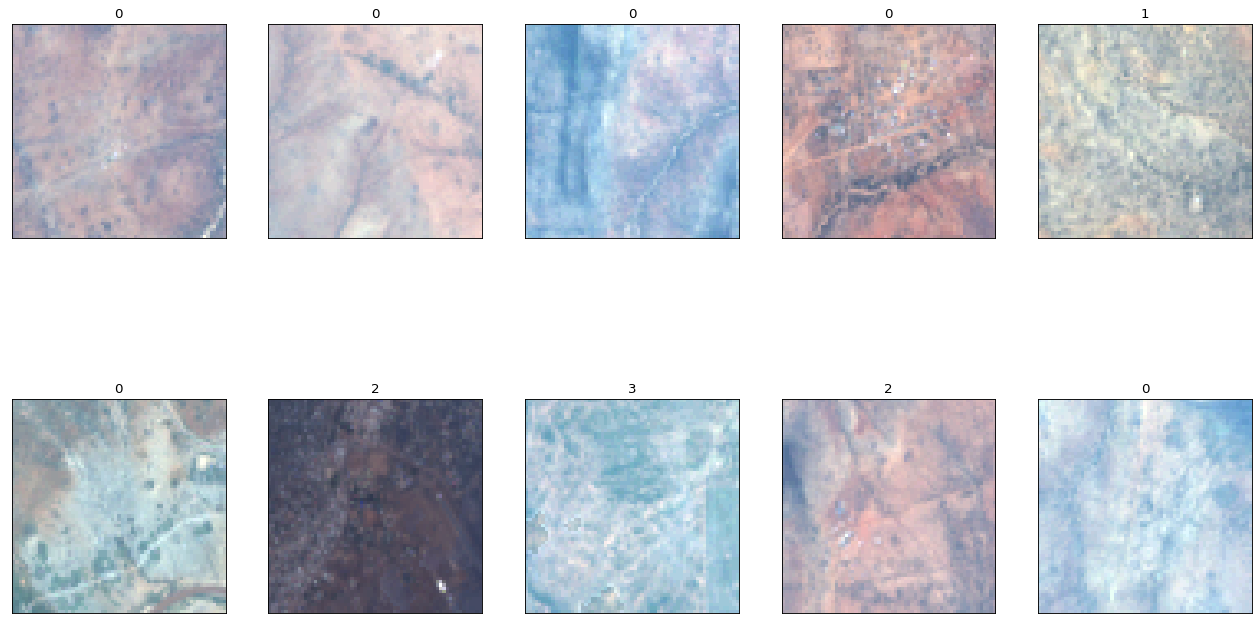

In [12]:
fig=plt.figure(figsize=(20, 30), dpi= 80, facecolor='w', edgecolor='k')
for i in range(1,11):
    plt.subplot(5, 5, i)
    img, label = get_img_from_example(parsed_examples[i+15])
    plt.imshow(img).axes.get_xaxis().set_visible(False)
    plt.imshow(img).axes.get_yaxis().set_visible(False)
    plt.title(str(label))

fig.show()